### Описание данных
* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = list(range(0, 100))

In [5]:
round(np.std(df, ddof=1), 3)  # numpy way, параметр числа степеней свободы, с округлением до тысячных

29.011

In [7]:
#df.A.std()  # pandas way

In [2]:
### 1. Предварительная обработка 

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/stat/1/games.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.shape

(16598, 11)

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

В строках Year и Publisher много пропущенных значений, удалим их

In [8]:
df = df.dropna() #удаление строк с пустыми значениями

In [9]:
df.columns = df.columns.str.lower() #привести 

### 2. Построим график распределения количества выпущенных игр по годам и вывести описательные характеристики переменной Year.

Описательные характеристики

In [29]:
import scipy.stats as ss

In [31]:
ss.mode(df.year)

ModeResult(mode=array([2009.]), count=array([1431]))

In [10]:
df.year.mode()

0    2009.0
dtype: float64

In [11]:
df.year.mean()

2006.4055613528942

In [12]:
df.year.median()

2007.0

In [30]:
df.year.value_counts().head() #тоже mode

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
Name: year, dtype: int64

In [13]:
df.year.describe() #все описательные характеристики

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

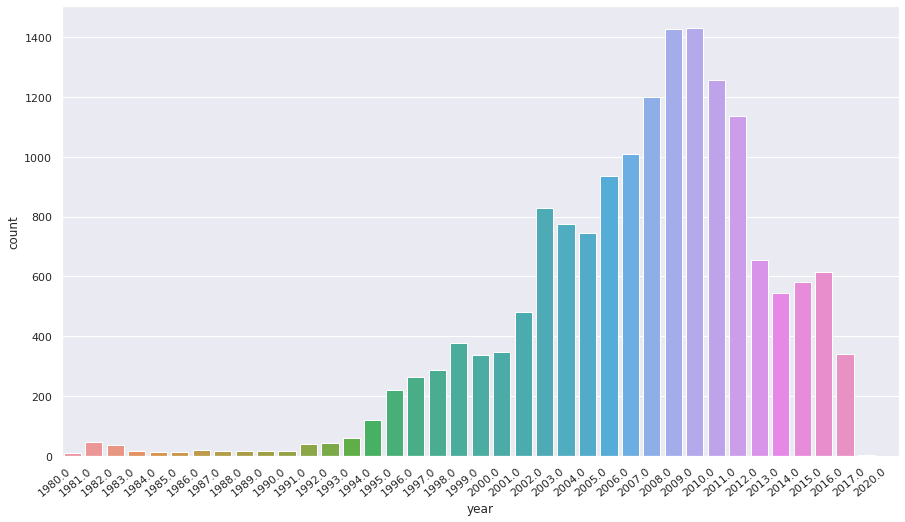

In [27]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.countplot(x = df.year) #рисуем распределение по годам
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

* Мода 2009
* Примерно половина игр была выпущена после 2007 года
* Медианный год больше, чем средний

### 3. Вычислить на каких платформах произошло больше всего релизов

Оставлю названия только тех платформ, частота встречаемости которых составляет более 7%

In [15]:
release = df.platform.value_counts(normalize=True) *100

In [16]:
release = release.reset_index().query('platform > 7')
release

,index,platform
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


### 4. Выведу издателей, игры которых встречаются в датасете чаще всего

In [17]:
df.publisher.value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: publisher, dtype: int64

### 5. Вычислить регион, в котором медианное значение объема продаж игр Nintendo является наибольшим

In [18]:
nintendo = df.query("publisher == 'Nintendo'")

In [19]:
nintendo.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
nintendo.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


Медианное значение наибольшее в регионе North America

### 6. Изучить объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотреть на медиану, среднее, межквартильный размах.

Построю боксплот с жанрами и объемом продаж в Японии

<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

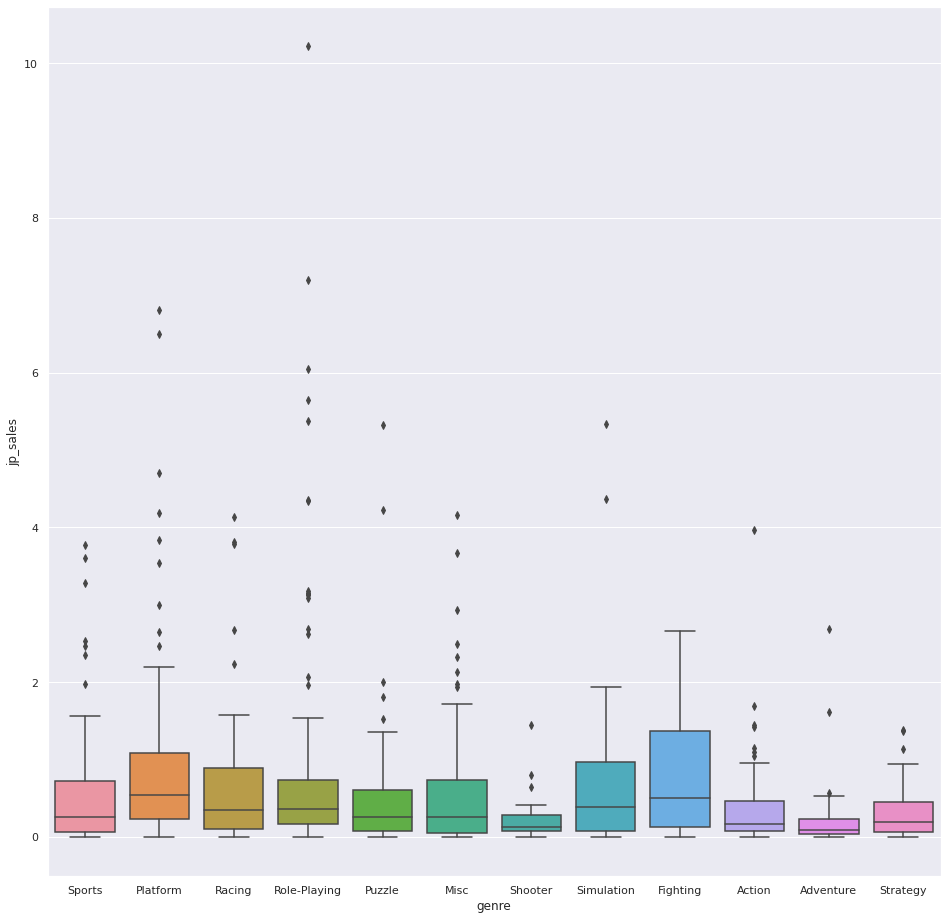

In [24]:
plt.figure(figsize=(16,16))
sns.boxplot(data = nintendo, x = 'genre', y = 'jp_sales')

* Межквартильный размах у Strategy меньше, чем у Puzzle
* Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
* Наибольший межквартильный размах наблюдается у игр жанра Fighting

### 7. Визуализирую динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. Вычислю в какие моменты времени было продано больше всего игр жанра Sports

In [32]:
df3 = nintendo.query("genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
        .groupby(['year', 'genre'], as_index=False).global_sales.sum()
df3.head()

,year,genre,global_sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17


<AxesSubplot:xlabel='year', ylabel='global_sales'>

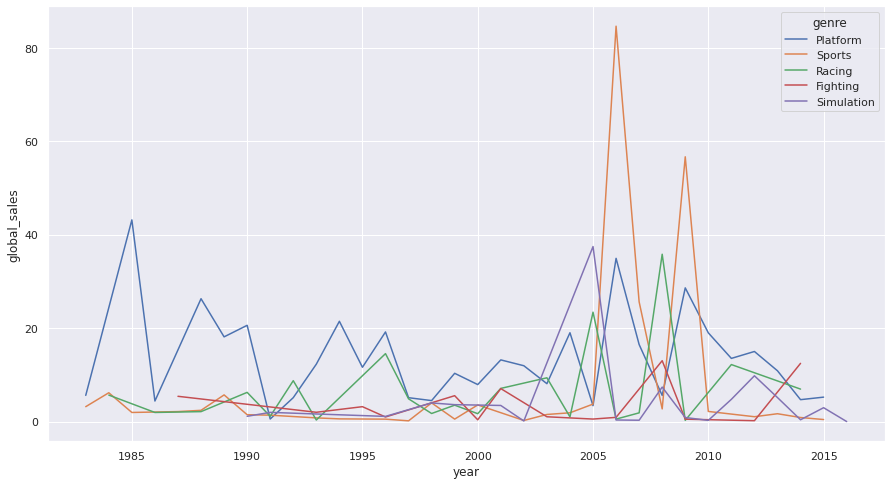

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year', y = 'global_sales', hue = 'genre', data=df3)

На отрезке 2005 - 2010 было продано больше всего игр жанра Sports 